<a href="https://colab.research.google.com/github/MarcoATL/MachineLearning/blob/main/Algoritmo_genetico_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algoritmo generico Avance (Hasta el punto numero 2)

In [ ]:
import numpy as np
import random
from tabulate import tabulate

def binario_a_decimal(binario):
    posicion = 0
    decimal = 0
    binario = binario[::-1]
    for digito in binario:
        multiplicador = 2**posicion
        decimal = decimal + int(digito) * multiplicador
        posicion = posicion + 1
    return decimal

def funcion_objetivos(decimales):

    funcion_objetivo = [] 

    for k in decimales:
        resultado = abs((k-5)/(2+np.sin(k)))
        funcion_objetivo.append(resultado)
    return funcion_objetivo

def generar_numeros_aleatorios():

    num_random = []

    for o in range(2):
        numero = random.uniform(0.00,1.00)
        num_random.append(numero)
    return num_random

def seleccion_padres(probabilidades_acumulada):

    num_random = generar_numeros_aleatorios()
    padres = []

    for i in range(2):
        for j in range(5):
            if num_random[i] <= probabilidades_acumulada[j] :
                padre = j+1
                padres.append(padre)
                break

    if (padres[0] == padres[1]):
        return seleccion_padres(probabilidades_acumulada)
    else:
        return padres

def padres_bin(padres,binarios):
    
    padres_en_binario = []

    for i in range(len(padres)):
        for j in range(len(binarios)):
            if (padres[i]-1 == j):
                padres_en_binario.append(binarios[j])

    return padres_en_binario

def cruza_padres(padres):
    punto_cruce = random.randrange(1,4)
    Part1 = []
    Part2 = []
    for i in padres:
        Part1.append(i[:punto_cruce])
        Part2.append(i[punto_cruce:])

    Hijo1 = np.concatenate((Part1[0],Part2[1]))
    Hijo2 = np.concatenate((Part1[1],Part2[0]))

    Hijos = []

    Hijos.append(Hijo1)
    Hijos.append(Hijo2)

    return Hijos

def mutacion_hijo(hijo):

    Pm = 0.1
    probabilidades = []

    for i in hijo:
        probabilidad = random.uniform(0.00,1.00)
        probabilidades.append(probabilidad)

    for j in range(4):
        if(probabilidades[j] < Pm):
            if (hijo[j] == 0):
                hijo[j] = 1
            else:
                hijo[j] = 0

    return hijo

def Algoritmo_genetico(binarios,generacion):

    Individuos_seleccionados = []
    Individuos_Fitness = []
    bucle = 1
    while (bucle < 4):
        #convirtiendo binario a decimal

        decimales = []
        for j in binarios:   
            decimal = binario_a_decimal(j)
            decimales.append(decimal)

        funcion_objetivo = []

        #calculando funcion objetivo

        funcion_objetivo = funcion_objetivos(decimales)

        ###calculando el total de la funcion objetivo

        total= 0

        for l in funcion_objetivo:
            total = total + l

        probabilidades = []

        for m in funcion_objetivo:
            probabilidad = (m/total)
            probabilidad = round(probabilidad,3)
            probabilidades.append(probabilidad)

        probabilidades_acumulada =[]
        acumulada = 0

        for n in probabilidades:
            acumulada = acumulada + n
            probabilidades_acumulada.append(acumulada)

        ###numeros aleatorios para busqueda de padres

        aceptacion = False

        while aceptacion == False:
            padres = seleccion_padres(probabilidades_acumulada)
            Pc = 0.85
            Probabilidad_cruza = random.uniform(0.00,1.00)

            if Probabilidad_cruza < Pc:
                aceptacion = True
            else:
                aceptacion = False

        #-----------TERCERA PARTE CRUZA DE PADRES----------------------------

        padres_binario = padres_bin(padres,binarios)

        Hijos = cruza_padres(padres_binario)

        #-----------CUARTA PARTE MUTACION DE HIJOS---------------------------

        Hijos_mutados = []

        for p in Hijos:
            Hijo_M = mutacion_hijo(p)
            Hijos_mutados.append(Hijo_M)

        #-----------QUINTA PARTE SELECCION DE PADRES-------------------------

        Hijos_mutados.extend(padres_binario)
        individuos_finales = Hijos_mutados

        individuos_finales_decimal = []
        
        for i in individuos_finales:   
            decimal = binario_a_decimal(i)
            individuos_finales_decimal.append(decimal)
        
        Fx = funcion_objetivos(individuos_finales_decimal)
        
        if (bucle != 3):
            Arreglo_ordenado = Fx

            Arreglo_ordenado.sort()
            
            patron_1 = Arreglo_ordenado[-1]
            patron_2 = Arreglo_ordenado[-2]
            
            Hijo_1 = Fx.index(patron_1)
            Hijo_2 = Fx.index(patron_2)
            
            Individuos_seleccionados.append(individuos_finales[Hijo_1])
            Individuos_seleccionados.append(individuos_finales[Hijo_2])
            
            
        else:
            Arreglo_ordenado = Fx

            Arreglo_ordenado.sort()
            
            patron_1 = Arreglo_ordenado[-1]

            Hijo_1 = Fx.index(patron_1)

            Individuos_seleccionados.append(individuos_finales[Hijo_1])

        bucle = bucle + 1

    decimalesFinales = []
    for j in Individuos_seleccionados:   
      decimal = binario_a_decimal(j)
      decimalesFinales.append(decimal)
    Individuos_Fitness = funcion_objetivos(decimalesFinales)
  
    tab_bin = {'Binarios': Individuos_seleccionados,'F(X)': Individuos_Fitness }
    print('Generacion:'+str(generacion))
    print(tabulate(tab_bin, headers=['Individuos','F(x)']))
    print('\n')

    return Individuos_seleccionados      
#-------------------PARTE 1: Crear individuos----------------------

#creando individuos (binario)

binarios = []

for i in range(5):
    binario = np.random.randint(2,size=4)
    binarios.append(binario)

#-------------------CICLO PARA GENERAR GENERACIONES----------------------
for generacion in range(1,11):
    individuos = Algoritmo_genetico(binarios,generacion)
    binarios = individuos


Generacion:1
Individuos       F(x)
------------  -------
[1 0 0 1]     1.65829
[1 0 0 1]     1.65829
[1 1 1 1]     3.77318
[1 1 1 1]     3.77318
[1 1 1 1]     3.77318


Generacion:2
Individuos       F(x)
------------  -------
[1 1 1 1]     3.77318
[1 1 1 1]     3.77318
[1 0 0 1]     1.65829
[1 0 0 1]     1.65829
[1 1 1 1]     3.77318


Generacion:3
Individuos       F(x)
------------  -------
[1 1 1 1]     3.77318
[1 1 1 1]     3.77318
[1 0 0 1]     1.65829
[1 0 0 1]     1.65829
[1 1 1 1]     3.77318


Generacion:4
Individuos       F(x)
------------  -------
[1 1 1 1]     3.77318
[1 0 1 1]     5.99994
[1 0 0 1]     1.65829
[1 1 1 1]     3.77318
[1 0 0 1]     1.65829


Generacion:5
Individuos       F(x)
------------  -------
[1 1 1 1]     3.77318
[1 1 0 1]     3.30556
[1 0 1 1]     5.99994
[1 0 1 1]     5.99994
[1 1 1 1]     3.77318


Generacion:6
Individuos       F(x)
------------  -------
[1 0 1 1]     5.99994
[1 1 0 1]     3.30556
[1 0 1 1]     5.99994
[1 0 1 1]     5.99994
[1 1 1 1] 

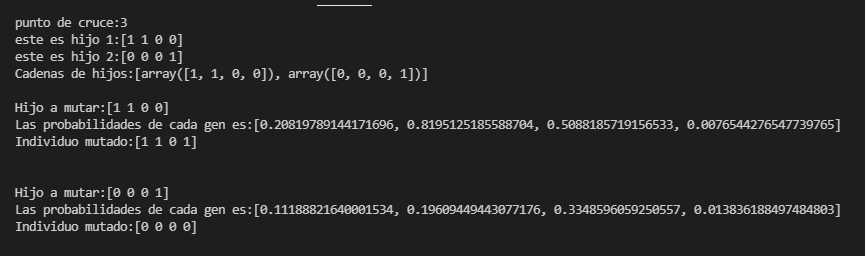

In [ ]:
import numpy as np
import random

def funcion_objetivos(decimal):
    resultado = abs((decimal-5)/(2+np.sin(decimal)))
    return resultado

print(funcion_objetivos(9))

1.6582933319708366
